In [23]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [25]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [27]:
print('Train: x=%s, y=%s \nTest: x=%s, y=%s' % (x_train.shape, y_train.shape, x_test.shape,y_test.shape))

Train: x=(50000, 32, 32, 3), y=(50000, 1) 
Test: x=(10000, 32, 32, 3), y=(10000, 1)


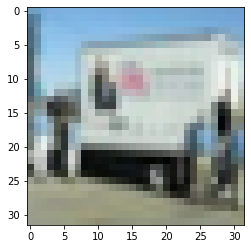

In [28]:
plt.imshow(x_train[76])

In [29]:
y_train[76]

array([9], dtype=uint8)

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
x_train[76]

array([[[118, 157, 187],
        [110, 162, 196],
        [118, 172, 219],
        ...,
        [114, 161, 207],
        [114, 161, 207],
        [113, 161, 207]],

       [[ 84, 120, 147],
        [ 88, 136, 168],
        [120, 173, 218],
        ...,
        [113, 165, 217],
        [114, 164, 216],
        [115, 163, 212]],

       [[ 85, 117, 142],
        [ 99, 141, 171],
        [131, 183, 225],
        ...,
        [120, 168, 216],
        [120, 168, 215],
        [119, 167, 213]],

       ...,

       [[155, 158, 142],
        [152, 156, 136],
        [151, 155, 133],
        ...,
        [105, 106,  87],
        [ 82,  84,  63],
        [127, 129, 105]],

       [[154, 155, 138],
        [155, 157, 137],
        [156, 158, 136],
        ...,
        [150, 152, 130],
        [142, 145, 120],
        [139, 142, 113]],

       [[153, 155, 143],
        [152, 155, 139],
        [154, 156, 139],
        ...,
        [145, 147, 128],
        [148, 150, 127],
        [146, 149, 119]]

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
to_categorical(y_train)[76]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [35]:
#Normalizing= make it easies for the neuron to process the data 
#x-min(x)/(max-min)
#x-0/(255-0)
#x/255
x_train=x_train/255
x_test=x_test/255

# CNN Model Training

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [44]:
#Convolutional Layer
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Image From 32 by 32 to 1024 before final layer
model.add(Flatten())

#128 Neurons in Dense Hidden Layer(you can change this number of neurons)
model.add(Dense(128 ,input_shape=x_train.shape[1:],activation='relu'))

#Last Layer in the Classifir, thus 10 possible classes
model.add(Dense(10,activation='softmax'))


#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])  #we can add in additionial merics

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [46]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 157s 3ms/sample - loss: 1.4641 - accuracy: 0.4701 - val_loss: 1.2356 - val_accuracy: 0.5564
Epoch 2/10
50000/50000 [==============================] - 134s 3ms/sample - loss: 1.0973 - accuracy: 0.6144 - val_loss: 1.0979 - val_accuracy: 0.6032
Epoch 3/10
50000/50000 [==============================] - 138s 3ms/sample - loss: 0.9547 - accuracy: 0.6622 - val_loss: 0.9966 - val_accuracy: 0.6554
Epoch 4/10
50000/50000 [==============================] - 134s 3ms/sample - loss: 0.8471 - accuracy: 0.7042 - val_loss: 0.9168 - val_accuracy: 0.6831
Epoch 5/10
50000/50000 [==============================] - 121s 2ms/sample - loss: 0.7752 - accuracy: 0.7276 - val_loss: 0.8797 - val_accuracy: 0.6940
Epoch 6/10
50000/50000 [==============================] - 122s 2ms/sample - loss: 0.7137 - accuracy: 0.7499 - val_loss: 0.8934 - val_accuracy: 0.6965
Epoch 7/10
50000/50000 [==========================

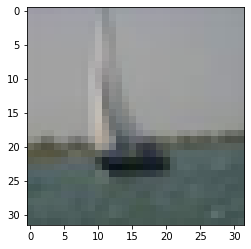

In [47]:
plt.imshow(x_test[55].reshape(32,32,3))

In [48]:
np.argmax(y_test[55]) #argmax give max value position

8

In [49]:
np.argmax(model.predict(x_test[55][None,:]))

8